# Predicting Customer Churn for GenBank
### By: Victor Solis
---

The main objective of this project is to determine whether a bank has the potential to reduce customer churn by 25% based on an estimated current rate of churn.

The project charter can be found using the following link: [Project Charter](https://eccollege-my.sharepoint.com/:p:/r/personal/vsoli8630_365_elmhurst_edu/_layouts/15/Doc.aspx?sourcedoc=%7BF2A01326-64A8-46CA-B0F4-414E4260A966%7D&file=Churn_Project_CHARTER.ppt&action=edit&mobileredirect=true)

## Business Understanding

My first task is to determine if the results of a prototype model supports the business case of reducing churn by 25%. The evaluation metric that is the most important is churn precision. The second most important metrics is churn recall. High accuracy is also relevant, but it will take a backseat during this business understanding phase. I will begin by importing the necessary libraries and packages to train a preliminary model. 

In [1]:
# importing data preparation and visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# importing test models, pre-processing functions, and object transformers
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [2]:
# importing dataset
url = 'https://raw.githubusercontent.com/crosstrack10/data-science-projects/main/datasets/project_bank_churn_training_data.csv'
training_df = pd.read_csv(url, sep='\t').sample(frac=1, random_state=5)

# chaning pandas setting to display all columns
pd.set_option('display.max_columns', None)

# displaying first five rows
training_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3843,3844,15677804,Aliyeva,783,Spain,Male,38,1,0.00,3,1,1,80178.54,1
6189,6190,15572408,Chambers,714,Germany,Male,39,3,149887.49,2,1,0,63846.36,0
3490,3491,15809137,Sagese,453,France,Male,29,6,0.00,1,0,0,198376.02,1
3420,3421,15654519,Hassall,680,France,Male,31,1,0.00,2,1,1,3148.20,0
5289,5290,15741195,Okechukwu,613,Spain,Male,19,5,0.00,1,1,1,176903.35,0


In [3]:
# dataframe info
training_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9001 entries, 3843 to 2915
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9001 non-null   int64  
 1   CustomerId       9001 non-null   int64  
 2   Surname          9001 non-null   object 
 3   CreditScore      9001 non-null   int64  
 4   Geography        9001 non-null   object 
 5   Gender           9001 non-null   object 
 6   Age              9001 non-null   int64  
 7   Tenure           9001 non-null   int64  
 8   Balance          9001 non-null   float64
 9   NumOfProducts    9001 non-null   int64  
 10  HasCrCard        9001 non-null   int64  
 11  IsActiveMember   9001 non-null   int64  
 12  EstimatedSalary  9001 non-null   float64
 13  Exited           9001 non-null   int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.0+ MB


In [4]:
# general numerical statistics
training_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9001.00000,9.001000e+03,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000
mean,4501.00000,1.569091e+07,650.129763,38.929230,5.006444,76418.468026,1.531608,0.702366,0.513499,100202.711437,0.206422
std,2598.50922,7.185523e+04,96.808262,10.454079,2.887976,62453.340081,0.582071,0.457243,0.499846,57495.310987,0.404759
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2251.00000,1.562870e+07,583.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51016.020000,0.000000
50%,4501.00000,1.569096e+07,651.000000,37.000000,5.000000,97331.190000,1.000000,1.000000,1.000000,100442.220000,0.000000
75%,6751.00000,1.575309e+07,717.000000,44.000000,7.000000,127649.640000,2.000000,1.000000,1.000000,149401.330000,0.000000
max,9001.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [5]:
# counting data types
training_df.dtypes.value_counts()

int64      9
object     3
float64    2
dtype: int64

In [6]:
# retreiving current churn rate based on original training data
round(training_df.Exited.value_counts(normalize=True), 2)

0    0.79
1    0.21
Name: Exited, dtype: float64

The current churn rate based on the training data is about 21%. If some prototype models show high precision accuracy, then the customer churn project can move forward.

In [7]:
# dropping irrelevant and similar variables
training_df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [8]:
# storing columns and data types in dictionary
cols_df = pd.DataFrame(training_df.dtypes, columns=['data_type']).reset_index()
cols_df.rename(columns={'index':'cols'}, inplace=True)

In [9]:
# categorical variables
cat_columns = list(cols_df.loc[cols_df.data_type == 'object', 'cols'])
print('Categorical:', cat_columns, '\n')

# numerical variables
num_columns = list(cols_df.loc[cols_df.data_type != 'object', 'cols'])
num_columns.remove('Exited')
print('Numerical:', num_columns)

Categorical: ['Geography', 'Gender'] 

Numerical: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']


In [10]:
# dividing dataset into features and target
X = training_df.drop(['Exited'], axis=1)
y = training_df['Exited']

# splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20, shuffle=True, random_state=5)

In [11]:
# checking shapes of train test split
print('X_train: ', X_train.shape, 'X_test: ', X_test.shape, 'y_train: ', y_train.shape, 'X_test: ', y_test.shape, sep='\n')

X_train: 
(7200, 10)
X_test: 
(1801, 10)
y_train: 
(7200,)
X_test: 
(1801,)


In [12]:
# creating preprocessing objects
simple_imp = SimpleImputer(strategy = 'median')
constant_imp = SimpleImputer(strategy = 'most_frequent')
ohe = OneHotEncoder(handle_unknown = 'ignore')
standarizer = StandardScaler()

In [13]:
# creating pipeline for categorical variable transformations
imp_cat = make_pipeline(constant_imp, ohe)

In [14]:
# creating pipeline for numerical variable transformations
imp_num = make_pipeline(simple_imp, standarizer)

In [15]:
# transforming variables using a column transformer
ct_imputer = make_column_transformer(
    (imp_cat, cat_columns),
    (imp_num, num_columns)
)

In [16]:
# creating an instances of regression models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

logreg = LogisticRegression(max_iter=500)
svmc = SVC()
nbc = GaussianNB()
cltree = DecisionTreeClassifier()
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()

In [17]:
# creating a pipelines
logreg_pipe = make_pipeline(ct_imputer, logreg)
logreg_pipe.fit(X_train, y_train);
svmc_pipe = make_pipeline(ct_imputer, svmc)
svmc_pipe.fit(X_train, y_train);
nbc_pipe = make_pipeline(ct_imputer, nbc)
nbc_pipe.fit(X_train, y_train);
cltree_pipe = make_pipeline(ct_imputer, cltree)
cltree_pipe.fit(X_train, y_train);
rfc_pipe = make_pipeline(ct_imputer, rfc)
rfc_pipe.fit(X_train, y_train);
gbc_pipe = make_pipeline(ct_imputer, gbc)
gbc_pipe.fit(X_train, y_train);

In [18]:
# importing cross val score function
from sklearn.model_selection import cross_val_score

# creating cross val score function for classification models
def cross_val_score_metrics(model_pipeline, feature_set=X_train, label_vect=y_train, cfolds=5):
    model_name = str(list(model_pipeline.named_steps.values())[1]).replace('()', '')
    list_of_scores = ['precision', 'recall', 'accuracy', 'roc_auc']
    scores_dict = {}
    for metric in [(metric) for metric in list_of_scores]:
        scores_dict[model_name + ' - ' + metric] = round(
            cross_val_score(model_pipeline, X=feature_set, y=label_vect, cv=cfolds, scoring=metric).mean(), 2)
    return scores_dict

In [19]:
# comparing models and timing training time
import time
start_time = time.time()

# model list
model_list = [logreg_pipe, svmc_pipe, nbc_pipe, cltree_pipe, rfc_pipe, gbc_pipe]

# using custom function on each model and storing results in a dataframe
df_performance = pd.DataFrame(columns=['model_metric', 'scores'])

# storing model results in a dataframe
for model in model_list:
    cur_model = cross_val_score_metrics(model)
    performance_keys = pd.Series(cur_model.keys()) # storing model and metric
    performance_values = pd.Series(cur_model.values()) # storing score
    series_dict = {'model_metric': performance_keys,
                   'scores': performance_values}
    df_append = pd.concat(series_dict, axis=1)
    df_performance = df_performance.append(df_append)
    
end_time = time.time()
print('Training Run Time: {:.2f} seconds'.format(end_time - start_time))

Training Run Time: 103.71 seconds


In [20]:
# re-structuring model results
df_performance[['model', 'metric']] = df_performance.model_metric.str.split(' - ', expand=True)
df_performance = df_performance[['model', 'metric', 'scores']]
df_performance = df_performance.sort_values(by=['metric', 'scores'], ascending=False)

In [21]:
# displaying model results
df_performance_pt = pd.pivot_table(
    data=df_performance,
    values='scores',
    index=['model'],
    columns=['metric'],
    aggfunc=np.sum
)

# highlighting max values
df_performance_pt.style.highlight_max(color='lightgreen', axis=0)

metric,accuracy,precision,recall,roc_auc
model,,,,
DecisionTreeClassifier,0.800000,0.520000,0.540000,0.700000
GaussianNB,0.820000,0.580000,0.370000,0.790000
GradientBoostingClassifier,0.860000,0.780000,0.480000,0.870000
LogisticRegression(max_iter=500),0.810000,0.610000,0.220000,0.770000
RandomForestClassifier,0.860000,0.760000,0.460000,0.850000
SVC,0.860000,0.810000,0.400000,0.840000


There are three models used in the preliminary run test returning high precision scores without preparing the data - SVC (0.82), Gradient Boosting Classifier (0.78), and Random Forest Classifier (0.78). The results show adequate performance to move forward with the project. The current estimated churn rate of 0.21 also makes this project a priority based on the initial performance results. Based on initial performances, I will retrieve the most important features in the Gradient Boosting classifier.

In [22]:
# creating empty lists
cat_cols = []
num_cols = []

# storing column names in appropriate list
for col in training_df.columns:
    if training_df[col].dtype == np.dtype('O'):
        cat_cols.append(col)
    else:
        num_cols.append(col)

In [23]:
# combining both, objects first
ordered_cols = cat_cols + num_cols
training_df = training_df.reindex(columns=ordered_cols)
print(training_df.columns.values)

['Geography' 'Gender' 'CreditScore' 'Age' 'Tenure' 'Balance'
 'NumOfProducts' 'HasCrCard' 'IsActiveMember' 'EstimatedSalary' 'Exited']


In [24]:
# creating custom function to return feature names
def return_features(df):
    feature_list = []
    for col in list(df.columns.values): # loops through columns in dataframe
        if df[col].dtype == np.dtype('O'): # checks if object type
            for val in list(df[col].unique()): # loops through unique object values
                feature_name = str(col) + '-' + str(val) # concatenates strings
                feature_list.append(feature_name) # appends to list
        elif df[col].dtype != np.dtype('O'): # checks if non-object type
            feature_list.append(str(col)) # appends to list
        else:
            pass
    return feature_list

In [25]:
# storing correct order of features used in training models
feats = return_features(training_df)[:-1]
print(feats)

['Geography-Spain', 'Geography-Germany', 'Geography-France', 'Gender-Male', 'Gender-Female', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']


In [26]:
[feat for feat in feats]

['Geography-Spain',
 'Geography-Germany',
 'Geography-France',
 'Gender-Male',
 'Gender-Female',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

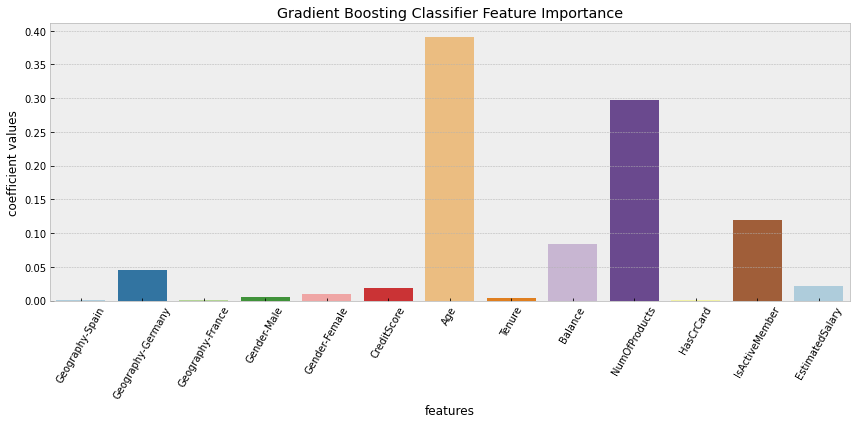

In [27]:
# importing seaborn library
import seaborn as sns

# retrieving equation intercept and standarized coefficients
coefs = gbc_pipe.named_steps.gradientboostingclassifier.feature_importances_

# plot feature importance
plt.style.use('bmh')
plt.figure(figsize=(12,6))

ax = sns.barplot(x=[feat for feat in feats], y=abs(coefs), palette='Paired')
plt.title('Gradient Boosting Classifier Feature Importance')
plt.xlabel('features')
plt.ylabel('coefficient values')
plt.xticks(rotation=60)
plt.tight_layout()

## Data Understanding

We can now proceed with the data understanding phase after verifying the initial performance results are aligned with the project's goal.

In [28]:
# counting feature nulls
feat_null_counts = training_df.isna().sum().sort_values(ascending=False)
feat_null_counts[feat_null_counts > 0]

Series([], dtype: int64)

There are no null values present in the training dataset. Despite that, It is ideal to include feature imputers somewhere in the machine learning pipeline to avoid data leakages and error when running models.

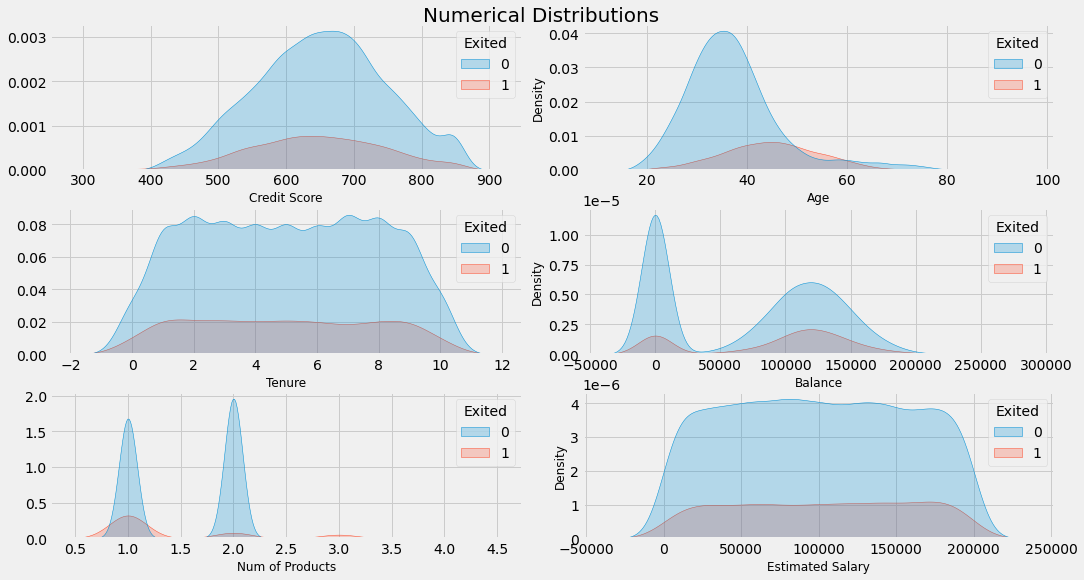

In [29]:
# numerical variables distributions
plt.style.use('fivethirtyeight')
fig, axes = plt.subplots(3, 2, figsize=(15, 8)) # creates figure and axes
fig.tight_layout() # removes extra whitespaces
fig.subplots_adjust(top=0.95)
fig.suptitle('Numerical Distributions', fontsize=20); # spacing out title


# adding plots to subplots
sns.kdeplot(ax=axes[0, 0], data=training_df, hue='Exited', x='CreditScore', fill=True);
sns.kdeplot(ax=axes[0, 1], data=training_df, hue='Exited', x='Age', fill=True);
sns.kdeplot(ax=axes[1, 0], data=training_df, hue='Exited', x='Tenure', fill=True);
sns.kdeplot(ax=axes[1, 1], data=training_df, hue='Exited', x='Balance', fill=True);
sns.kdeplot(ax=axes[2, 0], data=training_df, hue='Exited', x='NumOfProducts', fill=True);
sns.kdeplot(ax=axes[2, 1], data=training_df, hue='Exited', x='EstimatedSalary', fill=True);

# changing x-label font sizes
axes[0, 0].set_xlabel(xlabel='Credit Score', fontsize=12);
axes[0, 1].set_xlabel(xlabel='Age', fontsize=12);
axes[1, 0].set_xlabel(xlabel='Tenure', fontsize=12);
axes[1, 1].set_xlabel(xlabel='Balance', fontsize=12);
axes[2, 0].set_xlabel(xlabel='Num of Products', fontsize=12);
axes[2, 1].set_xlabel(xlabel='Estimated Salary', fontsize=12);

# changing y-label font sizes
axes[0, 0].set_ylabel(ylabel='', fontsize=12);
axes[0, 1].set_ylabel(ylabel='Density', fontsize=12);
axes[1, 0].set_ylabel(ylabel='', fontsize=12);
axes[1, 1].set_ylabel(ylabel='Density', fontsize=12);
axes[2, 0].set_ylabel(ylabel='', fontsize=12);
axes[2, 1].set_ylabel(ylabel='Density', fontsize=12);

Distribution shapes include Gaussian, positively right-skewed, bimodal, and somewhat uniform distributions. Most of the preliminary models used do not require feature scaling. However, It is important to identify outliers in case a future model requires them to be removed.

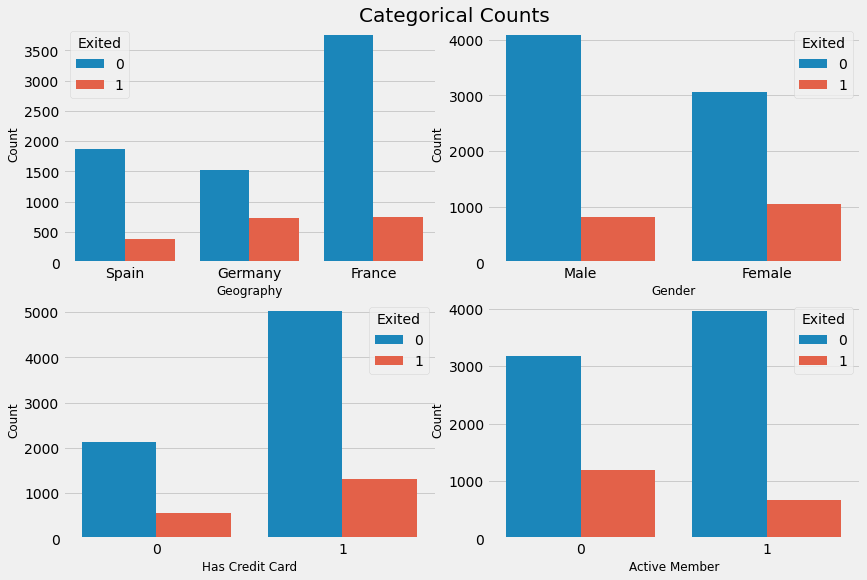

In [30]:
# categorical variables counts
import seaborn as sns

plt.style.use('fivethirtyeight')
fig, axes = plt.subplots(2, 2, figsize=(12, 8)) # creates figure and axes
fig.tight_layout() # removes extra whitespaces
fig.subplots_adjust(top=0.95)
fig.suptitle('Categorical Counts', fontsize=20); # spacing out title

# adding plots to subplots
sns.countplot(ax=axes[0, 0], data=training_df, hue='Exited', x='Geography', fill=True);
sns.countplot(ax=axes[0, 1], data=training_df, hue='Exited', x='Gender', fill=True);
sns.countplot(ax=axes[1, 0], data=training_df, hue='Exited', x='HasCrCard', fill=True);
sns.countplot(ax=axes[1, 1], data=training_df, hue='Exited', x='IsActiveMember', fill=True);

# changing x-label font sizes
axes[0, 0].set_xlabel(xlabel='Geography', fontsize=12);
axes[0, 1].set_xlabel(xlabel='Gender', fontsize=12);
axes[1, 0].set_xlabel(xlabel='Has Credit Card', fontsize=12);
axes[1, 1].set_xlabel(xlabel='Active Member', fontsize=12);

# changing y-label-font sizes
axes[0, 0].set_ylabel(ylabel='Count', fontsize=12);
axes[0, 1].set_ylabel(ylabel='Count', fontsize=12);
axes[1, 0].set_ylabel(ylabel='Count', fontsize=12);
axes[1, 1].set_ylabel(ylabel='Count', fontsize=12);

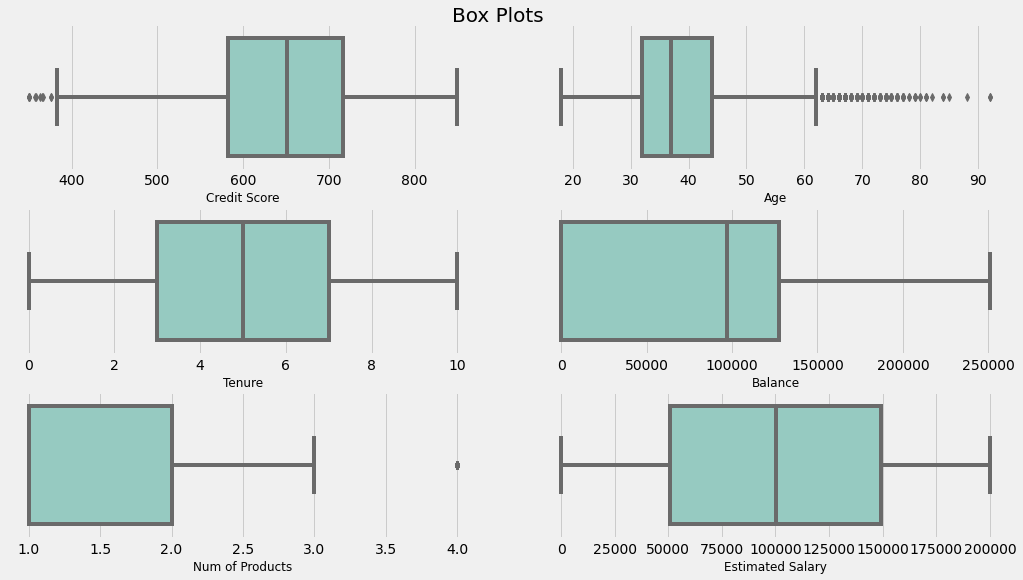

In [31]:
# Checking for outliers
import seaborn as sns

plt.style.use('fivethirtyeight')
fig, axes = plt.subplots(3, 2, figsize=(15, 8)) # creates figure and axes
fig.tight_layout() # removes extra whitespaces
fig.subplots_adjust(top=0.95)
fig.suptitle('Box Plots', fontsize=20); # spacing out title

# adding plots to subplots
sns.boxplot(ax=axes[0, 0], data=training_df, x='CreditScore', palette='Set3');
sns.boxplot(ax=axes[0, 1], data=training_df, x='Age', palette='Set3');
sns.boxplot(ax=axes[1, 0], data=training_df, x='Tenure', palette='Set3');
sns.boxplot(ax=axes[1, 1], data=training_df, x='Balance', palette='Set3');
sns.boxplot(ax=axes[2, 0], data=training_df, x='NumOfProducts', palette='Set3');
sns.boxplot(ax=axes[2, 1], data=training_df, x='EstimatedSalary', palette='Set3');

# changing x-label font sizes
axes[0, 0].set_xlabel(xlabel='Credit Score', fontsize=12);
axes[0, 1].set_xlabel(xlabel='Age', fontsize=12);
axes[1, 0].set_xlabel(xlabel='Tenure', fontsize=12);
axes[1, 1].set_xlabel(xlabel='Balance', fontsize=12);
axes[2, 0].set_xlabel(xlabel='Num of Products', fontsize=12);
axes[2, 1].set_xlabel(xlabel='Estimated Salary', fontsize=12);

The credit scores variable has some outliers, but the Age variable has the most. Other variables might benefit from standarization to deal with heavy skewness. It might also be helpful to create bins for the Balance and Estimated Salary variables.

In [32]:
# identifying outlier rows
from scipy import stats

outlier_rows = training_df[np.abs(stats.zscore(training_df['Age'])) >= 3]
print('Number of Outlier Rows:', len(outlier_rows))

Number of Outlier Rows: 116


In [33]:
# removing outliers that are greater than or equal to 3 Z-scores
training_df.drop(outlier_rows.index, inplace=True)
print('Current Number of Rows:', len(training_df))

Current Number of Rows: 8885


The target variable distribution seemed a little unbalanced at first glance. I will drop observations from the majority class to balance the training set.

In [34]:
# counting number of observations in each class
training_df.Exited.value_counts()

0    7036
1    1849
Name: Exited, dtype: int64

In [35]:
# importing resampling module
from sklearn.utils import resample

# seperating classes
training_df_majority = training_df[training_df.Exited == 0]
training_df_minority = training_df[training_df.Exited == 1]

# downsampling majority classs
training_df_majority_downsampled = resample(training_df_majority,
                                           replace=False,
                                           n_samples=training_df.Exited.value_counts()[1],
                                           random_state=5)

# combining classes
ds_training_df = pd.concat([training_df_majority_downsampled, training_df_minority])

# displaying new class counts
ds_training_df.Exited.value_counts()

0    1849
1    1849
Name: Exited, dtype: int64

## Modeling Phase

It is time to re-evaluate model performance after performing data preparation tasks. The best performing model will be a great candidate for hyper-parameter tuning. The same ten features will be used since all of them had some contribution power based off the Random Forest Feature Importance Plot.

In [36]:
# retrieving named parameters in Gradient Boosting Classifier Pipeline
gbc_pipe.named_steps.keys()

dict_keys(['columntransformer', 'gradientboostingclassifier'])

In [37]:
# specifying parameters to tune
params = {}
params['gradientboostingclassifier__n_estimators'] = [10, 50]
params['gradientboostingclassifier__min_samples_split'] = np.arange(2, 5, 1)
params['gradientboostingclassifier__min_samples_leaf'] = np.arange(5, 8, 1)
params['gradientboostingclassifier__max_depth'] = np.arange(5, 8, 1)

In [38]:
# creating grid search CV instance
start = time.time()
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(gbc_pipe, params, cv = 5, scoring = "precision")
grid.fit(X, y);
end = time.time()
print('Training Run Time: {:.2f} seconds'.format(end_time - start_time))

Training Run Time: 103.71 seconds


In [39]:
# displaying grid search results
results = pd.DataFrame(grid.cv_results_).sort_values("rank_test_score").reset_index(drop = True)[:10]
results.columns = results.columns.str.replace('param_gradientboosting', '')
results = results.iloc[:, np.r_[4:8, 14]]

# highlighting max values
results.style.highlight_max(color='lightgreen', axis=0)

,classifier__max_depth,classifier__min_samples_leaf,classifier__min_samples_split,classifier__n_estimators,mean_test_score
0,5,5,2,10,0.869541
1,5,5,3,10,0.869541
2,5,5,4,10,0.869541
3,5,6,2,10,0.867786
4,5,6,3,10,0.867786
5,5,6,4,10,0.867786
6,5,7,4,10,0.863783
7,5,7,3,10,0.863783
8,5,7,2,10,0.863783
9,6,7,3,10,0.853390


In [40]:
# printing best score and parameters
print("best precision score:", round(grid.best_score_, 2), "\n", "best parameters:", grid.best_params_, sep = "\n")

best precision score:
0.87


best parameters:
{'gradientboostingclassifier__max_depth': 5, 'gradientboostingclassifier__min_samples_leaf': 5, 'gradientboostingclassifier__min_samples_split': 2, 'gradientboostingclassifier__n_estimators': 10}


The best model after hyper-tuning shows a precision score of 87%. That is almost a 10% increase preliminary gradient boosting classifier precision score of 78%. The best parameters show a max tree depths of 5, minimum sample leafs of 5, minimum sample splits of 2, and number of trees of 10.

In [41]:
# predicting target probabilities
pred_probs = grid.predict_proba(X_test)

In [42]:
# predicting target
pred_out = grid.predict(X_test)

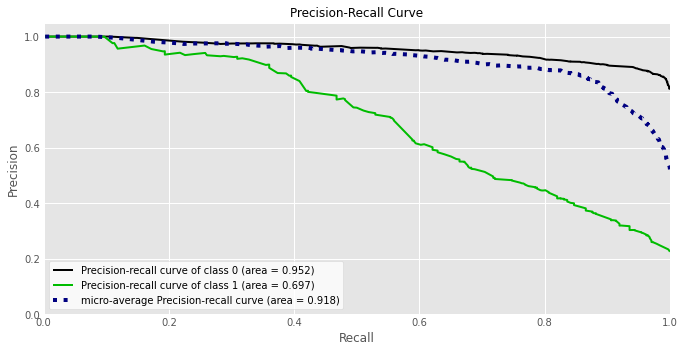

In [43]:
# importing scikitplot for machine learning evaluation metrics
import scikitplot as skplt

# plotting precision and recall curves
plt.style.use("ggplot")
skplt.metrics.plot_precision_recall(y_test, pred_probs, figsize = (10,5))
plt.legend(facecolor = "white")
plt.show()

Class 1 recall is poor at 40% when precision is close to 85%. This is acceptable since the primary goal is having a high precision score. At least the micro-average score is high using different parameters.

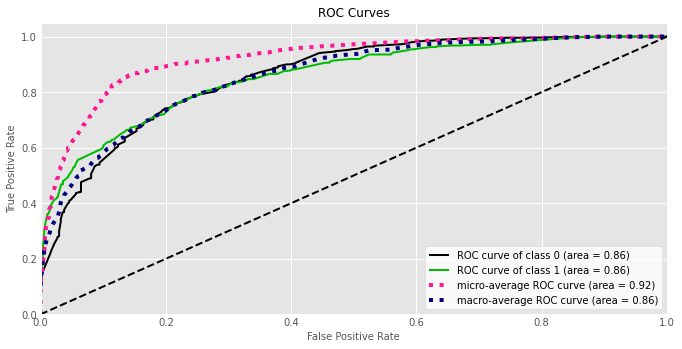

In [44]:
# plotting ROC curves
plt.style.use("ggplot")
skplt.metrics.plot_roc(y_test, pred_probs, figsize = (10,5))
plt.legend(facecolor = "white")
plt.show()

All AUC curves are greater than 0.85.

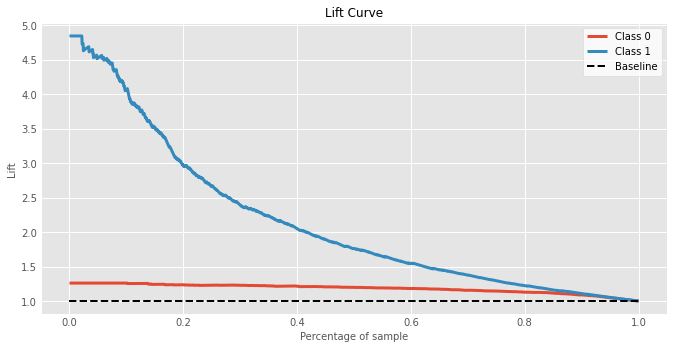

In [45]:
# plotting lift curves
plt.style.use("ggplot")
skplt.metrics.plot_lift_curve(y_test, pred_probs, figsize = (10,5))
plt.legend(facecolor = "white")
plt.show()

Class 1 lift (churn instances) is significantly higher than the baseline rate of 1 up until 60% of samples. It is 3 times higher than baseline at 20% of samples.

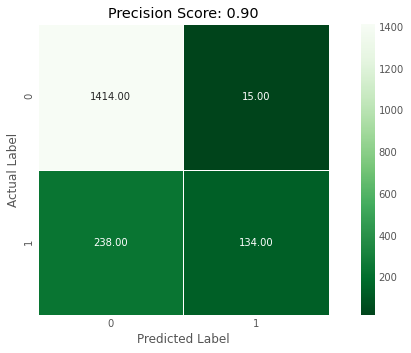

In [46]:
# plotting confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_out)

# creating figure and plotting heatmap
plt.figure(figsize = (10,5))
sns.heatmap(cm, annot = True, fmt = ".2f", linewidths = .5, square = True,  cmap = "Greens_r");
plt.ylabel("Actual Label");
plt.xlabel("Predicted Label");
plt.title("Precision Score: {:.2f}".format(round((np.sum(cm[1, 1])) / (np.sum(cm[:, 1])),2)));

The confusion matrix proves precision and accuracy are high while recall is low.

In [47]:
# importing production dataset
url = "https://raw.githubusercontent.com/crosstrack10/data-science-projects/main/datasets/project_bank_churn_production_data.csv"
production_df = pd.read_csv(url, sep='\t').sample(frac=1, random_state=5)
new_production_df = production_df.iloc[:, 3:13]

# displaying first five rows
production_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
544,9545,15728043,Udinese,648,Germany,Female,37,7,138503.51,2,1,0,57215.85
515,9516,15792922,Tu,639,Spain,Male,38,9,130233.14,1,1,1,81861.10
193,9194,15631512,Schneider,597,France,Female,26,8,149989.39,1,1,0,42330.58
11,9012,15717498,Boni,775,France,Male,42,6,133970.22,2,0,1,187839.90
279,9280,15573854,Chukwujekwu,727,France,Male,62,5,0.00,2,0,1,38652.96


In [48]:
# predicting production targets probabilities
prod_pred_probs = grid.predict_proba(new_production_df)
prod_pred_probs[:5, :2]

array([[0.86538544, 0.13461456],
       [0.86325388, 0.13674612],
       [0.83515465, 0.16484535],
       [0.84490998, 0.15509002],
       [0.88707078, 0.11292922]])

In [49]:
# predicting production targets
prod_pred_out = grid.predict(new_production_df)
prod_pred_out[:5]

array([0, 0, 0, 0, 0])

In [50]:
# creating a new dataframe combining production dataset with predictions
prod_df_results = production_df.copy()
prod_df_results['churn_prediction'] = prod_pred_out
prod_df_results[['not_churn_prob', 'churn_prob']] = prod_pred_probs
prod_df_results.sample(n=5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn_prediction,not_churn_prob,churn_prob
469,9470,15674573,Gearhart,713,France,Female,25,4,121172.97,1,1,1,56268.98,0,0.862819,0.137181
443,9444,15687001,Chiemenam,596,Germany,Male,54,1,123544.00,1,1,1,120314.75,0,0.603582,0.396418
917,9918,15755731,Davis,635,Germany,Male,53,8,117005.55,1,0,1,123646.57,0,0.603582,0.396418
504,9505,15591724,Liu,560,France,Female,44,5,143244.97,1,1,0,98661.27,0,0.652168,0.347832
343,9344,15798749,Davidson,845,Germany,Female,43,3,152063.59,2,1,0,97910.06,0,0.824231,0.175769


In [51]:
# displaying production churn predicition counts
prod_df_results.churn_prediction.value_counts()

0    935
1     65
Name: churn_prediction, dtype: int64

In [52]:
import os
os.getcwd()

'/home/vsolis/pymlsklearn/notebooks'

In [53]:
# identifying top 100 customers likely to churn
top_churners_df = (prod_df_results.loc[prod_df_results['churn_prob'] > 0.50]
 .sort_values(by=['churn_prob'], ascending=False)
 .reset_index(drop=True)[:100])

top_churners_df[['CustomerId', 'churn_prediction', 'not_churn_prob', 'churn_prob']]

,CustomerId,churn_prediction,not_churn_prob,churn_prob
0,15752294,1,0.264910,0.735090
1,15796764,1,0.274115,0.725885
2,15634551,1,0.276837,0.723163
3,15658409,1,0.281134,0.718866
4,15737025,1,0.283852,0.716148
...,...,...,...,...
60,15768163,1,0.467874,0.532126
61,15733361,1,0.467874,0.532126
62,15762762,1,0.467874,0.532126
63,15597949,1,0.467874,0.532126


There are only 65 customers with a churn probability that is greater than 50%. I would not recommend the bank to take action on customers with lower probabilities. My course of action to retain those 65 customers is to have the most experienced staff deal with them. They are the most capable customer service staff members, which means they best depth knowledge of how to deal with churn customers. Another solution is to save offers. Offer customers discounts and promotions to change the customer's decision about leaving the company.

In [54]:
# creating empty lists
cat_cols = []
num_cols = []

# storing column names in appropriate list
for col in new_production_df.columns:
    if new_production_df[col].dtype == np.dtype('O'):
        cat_cols.append(col)
    else:
        num_cols.append(col)

In [55]:
# combining both, objects first
ordered_cols = cat_cols + num_cols
new_production_df = new_production_df.reindex(columns=ordered_cols)
print(new_production_df.columns.values)

['Geography' 'Gender' 'CreditScore' 'Age' 'Tenure' 'Balance'
 'NumOfProducts' 'HasCrCard' 'IsActiveMember' 'EstimatedSalary']


In [56]:
# storing correct order of features used in training models
feats = return_features(new_production_df)
print(feats)

['Geography-Germany', 'Geography-Spain', 'Geography-France', 'Gender-Female', 'Gender-Male', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']


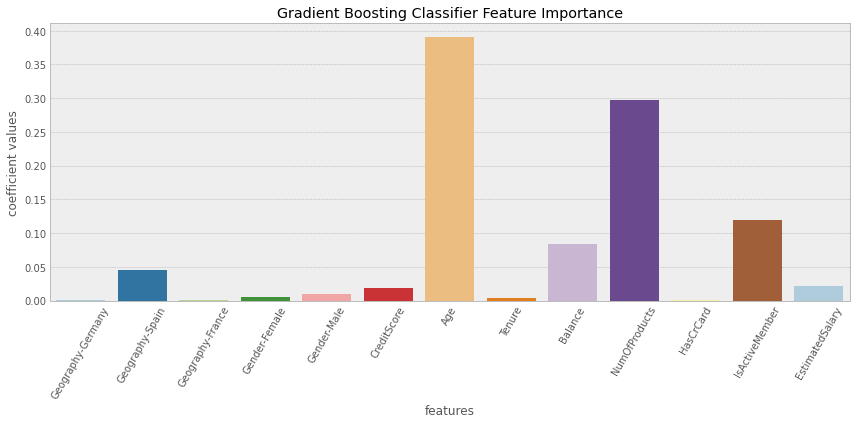

In [57]:
# importing seaborn library
import seaborn as sns

# retrieving equation intercept and standarized coefficients
coefs = grid.estimator.named_steps.gradientboostingclassifier.feature_importances_

# plot feature importance
plt.style.use('bmh')
plt.figure(figsize=(12,6))

ax = sns.barplot(x=[feat for feat in feats], y=abs(coefs), palette='Paired')
plt.title('Gradient Boosting Classifier Feature Importance')
plt.xlabel('features')
plt.ylabel('coefficient values')
plt.xticks(rotation=60)
plt.tight_layout()
plt.savefig('most_important_features.png')

The key variables in predicting customer churn are Age, NumOfProducts, and IsActiveMember. The bank should focus on targeting likely churn customers with the highest age proportions to reduce churn by at least 25%. Additionally, the bank should look into the number of products those customers are using. Customers that have one product should be advertised more to increase product usage. That can help change those customers' minds about leaving the company. It is also crucial to determine if those customers are active members. Customers that are not active are likely to churn in the long run. A common way to keep customers engaged is by offering a point system that enables customers to earn rewards using their products.

#### Customer Profiling For Churners

In [58]:
# converting categorical variable to numerical
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
X = pd.DataFrame() 

for col in top_churners_df.columns :
    if top_churners_df[col].dtype == np.dtype('O'):
        X[col] = label.fit_transform(top_churners_df[col])
    else:
        X[col] = top_churners_df[col]

In [59]:
# importing k-means algorithm and 3d plot
from mpl_toolkits.mplot3d import Axes3D # 3d plot
from sklearn.cluster import KMeans # K-means algorithm

# creating k-means model
clusters = 3 # number of clusters
model = KMeans(init = 'k-means++', 
               n_clusters = clusters, 
               n_init = 12) # number of times to run
model.fit(X)

labels = model.labels_
print('Clusters:', labels)

Clusters: [1 1 0 0 2 2 0 2 0 0 2 0 2 1 0 1 0 2 2 2 1 1 1 0 2 2 0 1 1 2 1 2 1 2 2 2 1
 2 0 1 1 0 1 1 1 0 1 1 0 1 0 1 2 1 1 2 0 1 0 1 1 1 1 0 2]


In [60]:
# adding clusters back to churn customer dataset
X['cluster_num'] = labels
X.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn_prediction,not_churn_prob,churn_prob,cluster_num
0,9566,15752294,31,582,0,0,38,9,135979.01,4,1,1,76582.95,1,0.264910,0.735090,1
1,9896,15796764,6,684,1,0,56,3,127585.98,3,1,1,80593.49,1,0.274115,0.725885,1
2,9541,15634551,57,727,1,1,46,3,115248.11,4,1,0,130752.01,1,0.276837,0.723163,0
3,9561,15658409,34,686,0,1,41,5,128876.71,3,1,1,106939.34,1,0.281134,0.718866,0
4,9614,15737025,46,635,0,1,33,1,0.00,3,0,0,178067.33,1,0.283852,0.716148,2


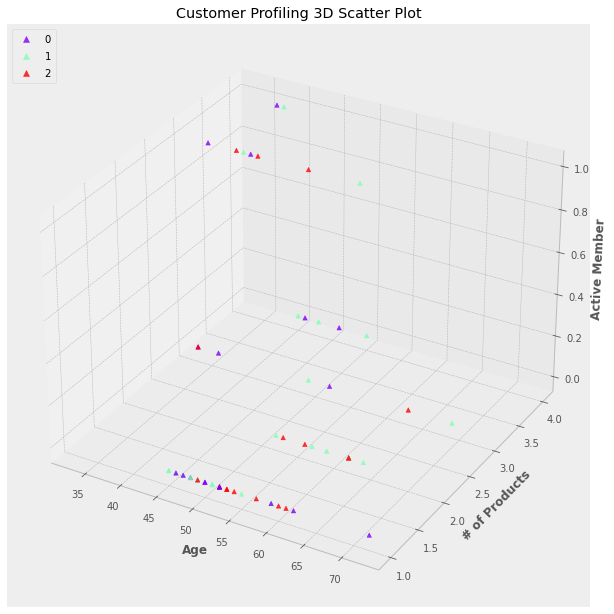

In [61]:
# creating figure
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection ="3d")

# adding x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
# creating 3D plot
sc = ax.scatter(X['Age'], X['NumOfProducts'], X['IsActiveMember'], c=X['cluster_num'],
             alpha=0.8, marker='^', cmap='rainbow')

# customizing title and axis labels
plt.title('Customer Profiling 3D Scatter Plot')
ax.set_xlabel('Age', fontweight ='bold')
ax.set_ylabel('# of Products', fontweight ='bold')
ax.set_zlabel('Active Member', fontweight ='bold')
ax.legend(*sc.legend_elements(), loc='upper left')

# show plot
plt.show()

The 3D scatter plot of the K-Means algorithm using 3 clusters on customers most likely to churn reveal some interesting findings. Most customers are between 40 - 60 years old, have less than or equal to 2 products, and are not active members. Those customers are also more present in clusters 0 and 2.

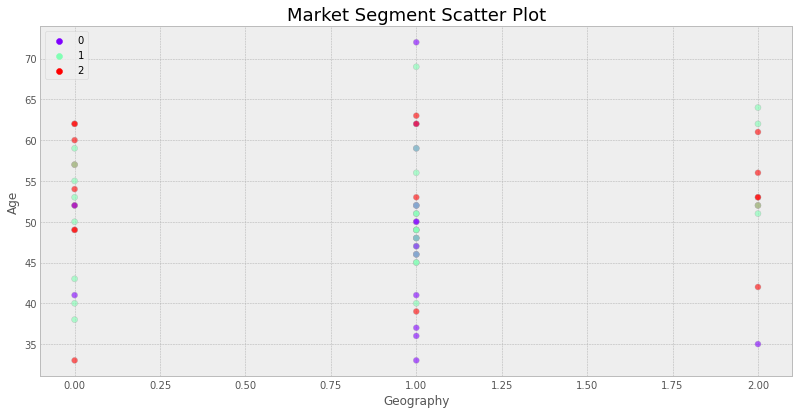

In [62]:
# creating figure
plt.figure(figsize=(12,6))

# creating 2D plot
sns.scatterplot(x='Geography', y='Age', data = X, hue = 'cluster_num', 
                alpha = 0.6, edgecolor = 'darkgrey', palette='rainbow')

# customizing title and axis labels
plt.title('Market Segment Scatter Plot', fontsize = 18)
plt.xlabel('Geography', fontsize = 12)
plt.ylabel('Age', fontsize = 12)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.legend(loc='upper left')

# show plot
plt.show()

**Major Market Segments:**
- France: Most likely churn customers are between ages 40 - 60, and mainly belong to clusters 1 and 2.
- Germany: Most likely churn customers are between ages 35 - 60, and mainly belong to clusters 0 and 2.
- Spain: Most likely churn customers are between ages 50 - 65, and mainly belong to clusters 1 and 2.

## Deployment Idea

A great way to deploy this model into production so users can use it at various locations is by containerizing the code, putting the model behind an API to expose it via a webpage, and deploying it to a cloud service. Containerizing the model code means it can run on a local machine, then running anywhere.Putting a model behind an API allows the code to separate from the user interface.If everything goes well, the code can be deployed to a cloud service, allowing anyone with security access to the machine learning model anywhere in the world.The model can be used by users to determine if a customer will churn.Those users will be able to take appropriate actions depending on the returned prediction.